# Creating New GitHub Repo with Jupyter Notebook

In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import pandas as pd 

In [4]:
df = pd.read_csv('real_estate_db.csv', encoding='latin-1') # imports the CSV into the local notebook
df.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,220336,NaN,140,16,2,Alaska,AK,Unalaska,Unalaska City,City,...,32.78177,31.91667,19.31875,440.46429,1894.0,0.25053,0.47388,0.30134,0.03443,0.09802
1,220342,NaN,140,20,2,Alaska,AK,Eagle River,Anchorage,City,...,38.97956,39.66667,20.05513,466.65478,1947.0,0.94989,0.52381,0.01777,0.00782,0.13575
2,220343,NaN,140,20,2,Alaska,AK,Jber,Anchorage,City,...,22.20427,23.16667,13.86575,887.67805,3570.0,0.00759,0.50459,0.06676,0.01000,0.01838
3,220345,NaN,140,20,2,Alaska,AK,Anchorage,Point Mackenzie,City,...,37.00750,34.00000,22.06347,281.49420,1049.0,0.20247,0.44428,0.05933,0.00000,0.21563
4,220347,NaN,140,20,2,Alaska,AK,Anchorage,Anchorage,City,...,34.96611,31.75000,20.49887,655.98066,2905.0,0.56936,0.51034,0.08315,0.06731,0.08711


In [5]:
df.drop_duplicates(subset=None, inplace=True) # drops duplicate rows
df.drop('BLOCKID', axis=1, inplace=True) # drops the nan-filled column

In [6]:
df = df.replace(r'^\s*$', np.nan, regex=True) # turns null characters into nan
df.dropna(axis=0, inplace=True) # drops nan-filled columns

In [7]:
df_sampled = df.sample(frac=0.01) # samples 0.1 of the db.

In [8]:
df_sampled.head() # prints the first five indexes of the new sampled db.

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
28042,274106,140,71,40,Oklahoma,OK,Ponca City,Ponca City City,CDP,tract,...,35.72210,31.50000,23.54095,306.30117,1167.0,0.54024,0.39565,0.06087,0.01304,0.20109
28041,274105,140,71,40,Oklahoma,OK,Ponca City,Ponca City City,CDP,tract,...,47.61985,50.83333,25.64405,528.37495,2185.0,0.88491,0.61270,0.02097,0.00000,0.09027
18952,256583,140,79,27,Minnesota,MN,Le Sueur,Le Sueur City,City,tract,...,42.61636,42.66667,24.41565,547.77694,2306.0,0.81243,0.53216,0.03415,0.00626,0.08480
29826,277462,140,75,42,Pennsylvania,PA,Richland,Newmanstown,Borough,tract,...,40.76860,40.00000,23.58824,650.46585,2750.0,0.75569,0.50917,0.01659,0.01092,0.10611
8778,237145,140,95,12,Florida,FL,Orlando,Orlovista,City,tract,...,31.26365,29.08333,15.33628,265.84915,1049.0,0.06709,0.33670,0.02648,0.00000,0.08827


In [9]:
# finds and prints the mean rate of hs_degree
hs_degree_mean = df_sampled[['hs_degree']].mean()
print(hs_degree_mean)

hs_degree    0.853128
dtype: float64


In [10]:
# write function to check whether or not the average person is graduated
def check_condition(value, threshold):
    if value > threshold:
        return 'Yes'
    else:
        return 'No'

# uses function to check whether values are greater or lesser and writes to new column
df_sampled['avg_person_graduated'] = df_sampled['hs_degree'].apply(lambda x: check_condition(x, 0.868529))

# verifies the counts of yesses and nos within the newly generated column
yes_count = df_sampled[df_sampled['avg_person_graduated'] == 'Yes'].shape[0]
no_count = df_sampled[df_sampled['avg_person_graduated'] == 'No'].shape[0]

# verifies whether function worked
print(f"\nNumber of 'Yes' in avg_person_graduated: {yes_count}")
print(f"Number of 'No' in avg_person_graduated: {no_count}")
df_sampled.head()


Number of 'Yes' in avg_person_graduated: 204
Number of 'No' in avg_person_graduated: 175


,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,avg_person_graduated
28042,274106,140,71,40,Oklahoma,OK,Ponca City,Ponca City City,CDP,tract,...,31.50000,23.54095,306.30117,1167.0,0.54024,0.39565,0.06087,0.01304,0.20109,No
28041,274105,140,71,40,Oklahoma,OK,Ponca City,Ponca City City,CDP,tract,...,50.83333,25.64405,528.37495,2185.0,0.88491,0.61270,0.02097,0.00000,0.09027,Yes
18952,256583,140,79,27,Minnesota,MN,Le Sueur,Le Sueur City,City,tract,...,42.66667,24.41565,547.77694,2306.0,0.81243,0.53216,0.03415,0.00626,0.08480,Yes
29826,277462,140,75,42,Pennsylvania,PA,Richland,Newmanstown,Borough,tract,...,40.00000,23.58824,650.46585,2750.0,0.75569,0.50917,0.01659,0.01092,0.10611,No
8778,237145,140,95,12,Florida,FL,Orlando,Orlovista,City,tract,...,29.08333,15.33628,265.84915,1049.0,0.06709,0.33670,0.02648,0.00000,0.08827,Yes


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# defines x and y values for training
data_no_hs_degree = df_sampled[['debt', 'rent_mean', 'hc_mortgage_mean', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity']]
X = data_no_hs_degree
y = df_sampled['avg_person_graduated'].apply(lambda x: 1 if x=='Yes' else 0)

In [13]:
# splits data into x and y trains and preds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [14]:
print(X_train) # prints X_train

          debt   rent_mean  hc_mortgage_mean  home_equity_second_mortgage  \
35500  0.61290   890.77634        1608.89280                      0.01708   
29826  0.68309   905.03306        1406.89717                      0.01248   
21230  0.94272  1194.99965        1296.69284                      0.11223   
4596   0.84656  1071.15091        2006.59914                      0.11111   
11725  0.52128  1101.88965        1388.01449                      0.06915   
...        ...         ...               ...                          ...   
35844  0.62338   847.48131        1884.53329                      0.01299   
9889   0.70972  1100.73151        1398.04903                      0.00000   
33117  0.44917   611.46033        1385.36382                      0.00000   
16085  0.76352  1426.79628        2124.42871                      0.00624   
22763  0.81616  1816.83621        2498.54059                      0.02529   

       second_mortgage  home_equity  
35500          0.01708      0.07021  

In [15]:
print(y_train) # prints y_train

35500    1
29826    0
21230    1
4596     0
11725    0
        ..
35844    0
9889     0
33117    1
16085    1
22763    1
Name: avg_person_graduated, Length: 303, dtype: int64


In [16]:
np.isnan(X_train).any() # checks X_train for any nan values

debt                           False
rent_mean                      False
hc_mortgage_mean               False
home_equity_second_mortgage    False
second_mortgage                False
home_equity                    False
dtype: bool

In [17]:
X_train.isnull().any() # checks X_train for any null values

debt                           False
rent_mean                      False
hc_mortgage_mean               False
home_equity_second_mortgage    False
second_mortgage                False
home_equity                    False
dtype: bool

In [18]:
np.isnan(y_train).any() # checks y_train for any nan values

False

In [19]:
y_train.isnull().any() # checks y_train for any null values

False

In [20]:
# loads important models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.metrics import accuracy_score

# defines model, including two layers
model = Sequential()
model.add(Dense(units=32, activation='ReLU', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='ReLU'))
model.add(Dense(units=1, activation='sigmoid'))

#imports optimizer and learning rate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# optimizer
initial_learning_rate = 0.001  # learning rate
optimizer = Adam(learning_rate=initial_learning_rate)

# learning rate scheduler
def lr_scheduler(epoch):
    return initial_learning_rate * 0.95 ** epoch

# callbacks learning rate per epoch
lr_callback = LearningRateScheduler(lr_scheduler)

In [21]:
# defines model compiler
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# fits model
model.fit(X_train, y_train, batch_size = 1, epochs = 100, callbacks=[lr_callback])

Epoch 1/100
303/303 [==============================] - 1s 923us/step - loss: 13.8130 - accuracy: 0.5413 - lr: 0.0010
Epoch 2/100
303/303 [==============================] - 0s 879us/step - loss: 12.4481 - accuracy: 0.4983 - lr: 9.5000e-04
Epoch 3/100
303/303 [==============================] - 0s 883us/step - loss: 5.3849 - accuracy: 0.5281 - lr: 9.0250e-04
Epoch 4/100
303/303 [==============================] - 0s 851us/step - loss: 4.1906 - accuracy: 0.5083 - lr: 8.5737e-04
Epoch 5/100
303/303 [==============================] - 0s 842us/step - loss: 7.4898 - accuracy: 0.4917 - lr: 8.1451e-04
Epoch 6/100
303/303 [==============================] - 0s 864us/step - loss: 4.9659 - accuracy: 0.4851 - lr: 7.7378e-04
Epoch 7/100
303/303 [==============================] - 0s 883us/step - loss: 3.3937 - accuracy: 0.4818 - lr: 7.3509e-04
Epoch 8/100
303/303 [==============================] - 0s 992us/step - loss: 4.2020 - accuracy: 0.5215 - lr: 6.9834e-04
Epoch 9/100
303/303 [=====================

In [23]:
# performs a prediction
y_hat = model.predict(X_test)

# prints out the whole accuracy
print(y_hat)

# reevaluates to binary
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

# prints out the accuracy again
print(y_hat)

# prints final accuracy
print(accuracy_score(y_test, y_hat))

3/3 [==============================] - 0s 2ms/step
[[0.38244775]
 [0.5091133 ]
 [0.30699965]
 [0.33607358]
 [0.65957654]
 [0.49264824]
 [0.7033243 ]
 [0.31783146]
 [0.6035212 ]
 [0.445834  ]
 [0.3727585 ]
 [0.48285115]
 [0.3142836 ]
 [0.7631702 ]
 [0.49732694]
 [0.90104526]
 [0.396039  ]
 [0.40993902]
 [0.69633114]
 [0.33761975]
 [0.40876442]
 [0.46476358]
 [0.3390164 ]
 [0.5959208 ]
 [0.36054713]
 [0.87523276]
 [0.5951397 ]
 [0.8650439 ]
 [0.5050291 ]
 [0.6532583 ]
 [0.56346714]
 [0.7930653 ]
 [0.71871936]
 [0.8592431 ]
 [0.34236288]
 [0.8242775 ]
 [0.33147472]
 [0.34079626]
 [0.7613334 ]
 [0.55747086]
 [0.37076193]
 [0.4952595 ]
 [0.26073715]
 [0.3191604 ]
 [0.38624474]
 [0.8619237 ]
 [0.92021185]
 [0.52615833]
 [0.3348885 ]
 [0.28700462]
 [0.38755816]
 [0.31717098]
 [0.48984864]
 [0.61148083]
 [0.58636934]
 [0.68119687]
 [0.4525634 ]
 [0.34191465]
 [0.99041   ]
 [0.29338357]
 [0.3533864 ]
 [0.39790192]
 [0.25408223]
 [0.6950447 ]
 [0.4534803 ]
 [0.7036975 ]
 [0.5040321 ]
 [0.3535625

In [24]:
accuracy_score(y_test, y_hat)

0.618421052631579

                             hs_degree  hs_degree_male  hs_degree_female  \
hs_degree                     1.000000        0.967506          0.965310   
hs_degree_male                0.967506        1.000000          0.870492   
hs_degree_female              0.965310        0.870492          1.000000   
debt                          0.253148        0.260438          0.221315   
rent_mean                     0.327022        0.320859          0.306138   
hc_mortgage_mean              0.305197        0.310381          0.273673   
home_equity_second_mortgage   0.093206        0.097534          0.082099   
second_mortgage               0.092946        0.103640          0.075187   
home_equity                   0.255617        0.260832          0.228118   

                                 debt  rent_mean  hc_mortgage_mean  \
hs_degree                    0.253148   0.327022          0.305197   
hs_degree_male               0.260438   0.320859          0.310381   
hs_degree_female             

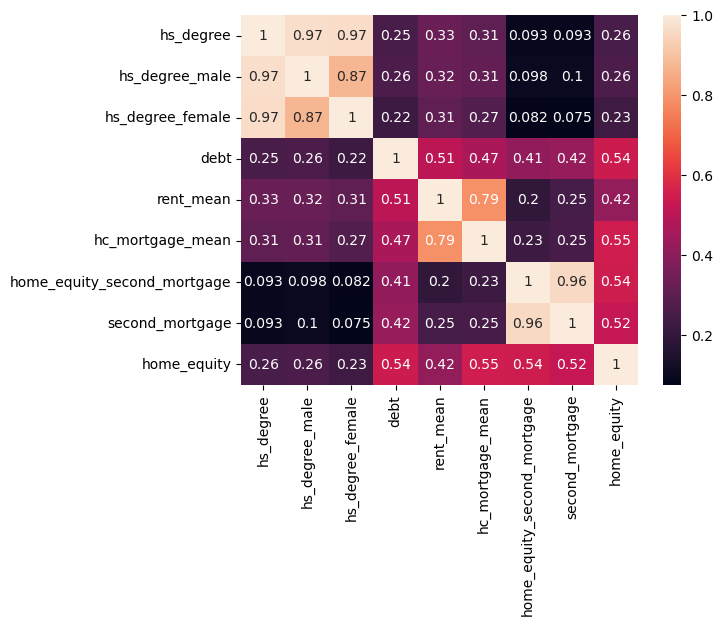

In [25]:
import matplotlib.pyplot as mp 
import seaborn as sb 
from PIL import _imaging
from PIL import Image
  
# import file with data 
data = df_sampled[['hs_degree', 'hs_degree_male', 'hs_degree_female', 'debt', 'rent_mean', 'hc_mortgage_mean', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity']]
# prints data that will be plotted 
# columns shown here are selected by corr() since 
# they are ideal for the plot 
print(data.corr()) 
  
# plotting correlation heatmap 
dataplot=sb.heatmap(data.corr(), annot=True)
  
# displaying heatmap
mp.show() 

In [64]:
import plotly.express as px
# computes average graduation rates by state
avg_grad_rates = df.groupby('state_ab')['hs_degree'].mean().reset_index()

# visualizes on a map using plotly
fig = px.choropleth(avg_grad_rates,
                    locations='state_ab',
                    locationmode='USA-states',
                    color='hs_degree',
                    hover_name='state_ab',
                    color_continuous_scale='blues',
                    title='Average High School Graduation Rates by State')
fig.update_layout(
    geo_scope='usa',  # limit map scope to USA
)
fig.show()